In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import f_oneway







### Paso 1

In [41]:
# Paso 1 - Creadondo data set de prueba
df = pd.read_csv("fact_application.csv")
df

,application_id,organization_id,provider_id,snapshot_date_id,applicationcode,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,...,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount,ppn_tm
0,609,1,1,20231012,app00609,701,352,167,182,4,...,5,0,0,1,1,0,0,0,0,2023-10-12 11:48:46.008
1,613,1,1,20231012,app00613,139,90,49,0,3,...,0,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
2,610,1,1,20231012,app00610,193,60,41,92,5,...,2,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
3,614,1,1,20231012,app00614,79,29,23,27,3,...,1,0,0,1,1,0,0,0,0,2023-10-12 11:48:46.008
4,612,1,1,20231012,app00612,357,176,107,74,4,...,9,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,655,1,1,20231012,app00655,57,28,15,14,3,...,0,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
908,661,1,1,20231012,app00661,73,25,24,24,3,...,5,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
909,658,1,1,20231012,app00658,252,126,95,31,4,...,2,0,0,1,1,0,0,0,0,2023-10-12 11:48:46.008
910,656,1,1,20231012,app00656,41,41,0,0,5,...,0,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008


In [42]:
df.describe()

,application_id,organization_id,provider_id,snapshot_date_id,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,DevAccountsCount,...,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount
count,912.000000,912.0,912.0,912.0,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,456.876096,1.0,1.0,20231012.0,263.184211,96.344298,70.880482,95.959430,6.389254,2.373904,...,0.726974,2.460526,0.002193,0.002193,0.221491,0.379386,0.002193,0.002193,0.019737,0.122807
std,263.906727,0.0,0.0,0.0,1254.604117,473.100976,355.346095,433.181744,22.494561,8.709326,...,0.888403,9.617183,0.046804,0.046804,0.483832,1.719882,0.046804,0.046804,0.139171,1.344275
min,1.000000,1.0,1.0,20231012.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.750000,1.0,1.0,20231012.0,9.000000,4.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,456.500000,1.0,1.0,20231012.0,74.000000,27.500000,15.000000,22.500000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,685.250000,1.0,1.0,20231012.0,221.000000,77.000000,55.000000,84.000000,4.000000,1.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,914.000000,1.0,1.0,20231012.0,27149.000000,10403.000000,7377.000000,9369.000000,177.000000,70.000000,...,4.000000,227.000000,1.000000,1.000000,3.000000,41.000000,1.000000,1.000000,1.000000,25.000000


In [43]:
# Porcentaje de 0s de cada columna
(df == 0).sum()/len(df) * 100

application_id                         0.000000
organization_id                        0.000000
provider_id                            0.000000
snapshot_date_id                       0.000000
applicationcode                        0.000000
FullResourcesCount                     0.000000
DevResourcesCount                      9.868421
QaResourcesCount                      31.140351
PdnResourcesCount                     25.219298
FullAccountsCount                      0.000000
DevAccountsCount                       9.868421
QaAccountsCount                       31.140351
PdnAccountsCount                      25.219298
RedSecurityChecksCount                60.635965
RedSecurityResourcesCount             60.635965
YellowSecurityChecksCount             38.706140
YellowSecurityResourcesCount          38.706140
RedFaultToleranceChecksCount          90.241228
RedFaultToleranceResourcesCount       90.241228
YellowFaultToleranceChecksCount       50.109649
YellowFaultToleranceResourcesCount    50

In [44]:
df.dtypes

application_id                         int64
organization_id                        int64
provider_id                            int64
snapshot_date_id                       int64
applicationcode                       object
FullResourcesCount                     int64
DevResourcesCount                      int64
QaResourcesCount                       int64
PdnResourcesCount                      int64
FullAccountsCount                      int64
DevAccountsCount                       int64
QaAccountsCount                        int64
PdnAccountsCount                       int64
RedSecurityChecksCount                 int64
RedSecurityResourcesCount              int64
YellowSecurityChecksCount              int64
YellowSecurityResourcesCount           int64
RedFaultToleranceChecksCount           int64
RedFaultToleranceResourcesCount        int64
YellowFaultToleranceChecksCount        int64
YellowFaultToleranceResourcesCount     int64
RedPerformanceChecksCount              int64
RedPerform

### Paso 2 

Eliminamos las columnas que no aportan valor al modelo. En este caso estás columnas tienen un único valor, o son categorias que no pueden ser utilizadas en el modelo. La variable `applicationcode` es un identificador de cada aplicación desplegada, se deja en el dataset dado que puede ser utilizada para explicar el modelo y dar interpretabilidad a los clusters generados.

In [55]:
# remove organization_id column
df = df.drop(columns=['organization_id', 'snapshot_date_id', 'application_id', 'provider_id', 'ppn_tm'])

In [56]:
# Paso 2 - Selección de características

# features = ['fullresourcescount','devresourcescount','qaresourcescount','pdnresourcescount','fullaccountscount','devaccountscount','qaaccountscount','pdnaccountscount','redsecuritycheckscount','redsecurityresourcescount']

features = ['RedSecurityChecksCount', 'RedSecurityResourcesCount',
            'YellowSecurityChecksCount', 'YellowSecurityResourcesCount',
            'RedFaultToleranceChecksCount', 'RedFaultToleranceResourcesCount',
            'YellowFaultToleranceChecksCount', 'YellowFaultToleranceResourcesCount',
            'RedPerformanceChecksCount', 'RedPerformanceResourcesCount',
            'YellowPerformanceChecksCount', 'YellowPerformanceResourcesCount',
            'RedCostOptimizingChecksCount', 'RedCostOptimizingResourcesCount',
            'YellowCostOptimizingChecksCount', 'YellowCostOptimizingResourcesCount'
           ]

features = df.columns.to_list()
# remove from features values applicationcode, snapshot_date, provider_id, organization_id and application_id
features.remove('applicationcode')



En total tenemos 24 caracteristicas cuantitativas y un identificador de cada aplicación.

# Analisis de los datos
Esta etapa se encarga de analizar los datos para encontrar tendencias, correlaciones y patrones. En esta etapa se pueden utilizar herramientas de visualización de datos para ayudar a identificar las características más importantes.

In [57]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

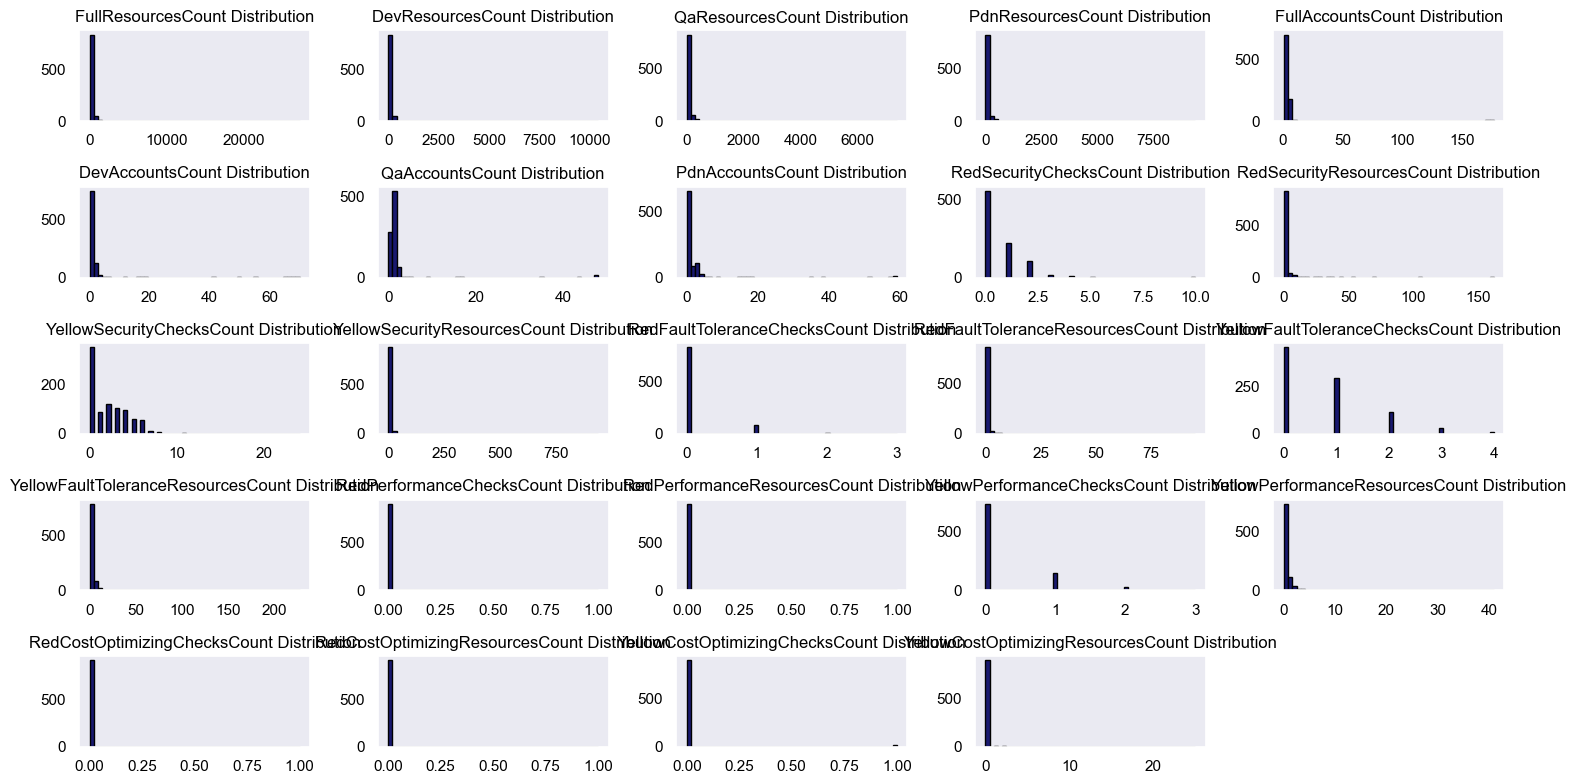

In [58]:
draw_histograms(df, features, 5, 5)

In [59]:
df[features].describe()

,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,DevAccountsCount,QaAccountsCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,...,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,263.184211,96.344298,70.880482,95.959430,6.389254,2.373904,1.709430,2.305921,0.591009,1.699561,...,0.726974,2.460526,0.002193,0.002193,0.221491,0.379386,0.002193,0.002193,0.019737,0.122807
std,1254.604117,473.100976,355.346095,433.181744,22.494561,8.709326,6.353992,7.518703,0.910028,7.967255,...,0.888403,9.617183,0.046804,0.046804,0.483832,1.719882,0.046804,0.046804,0.139171,1.344275
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,4.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,27.500000,15.000000,22.500000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,221.000000,77.000000,55.000000,84.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27149.000000,10403.000000,7377.000000,9369.000000,177.000000,70.000000,48.000000,59.000000,10.000000,162.000000,...,4.000000,227.000000,1.000000,1.000000,3.000000,41.000000,1.000000,1.000000,1.000000,25.000000


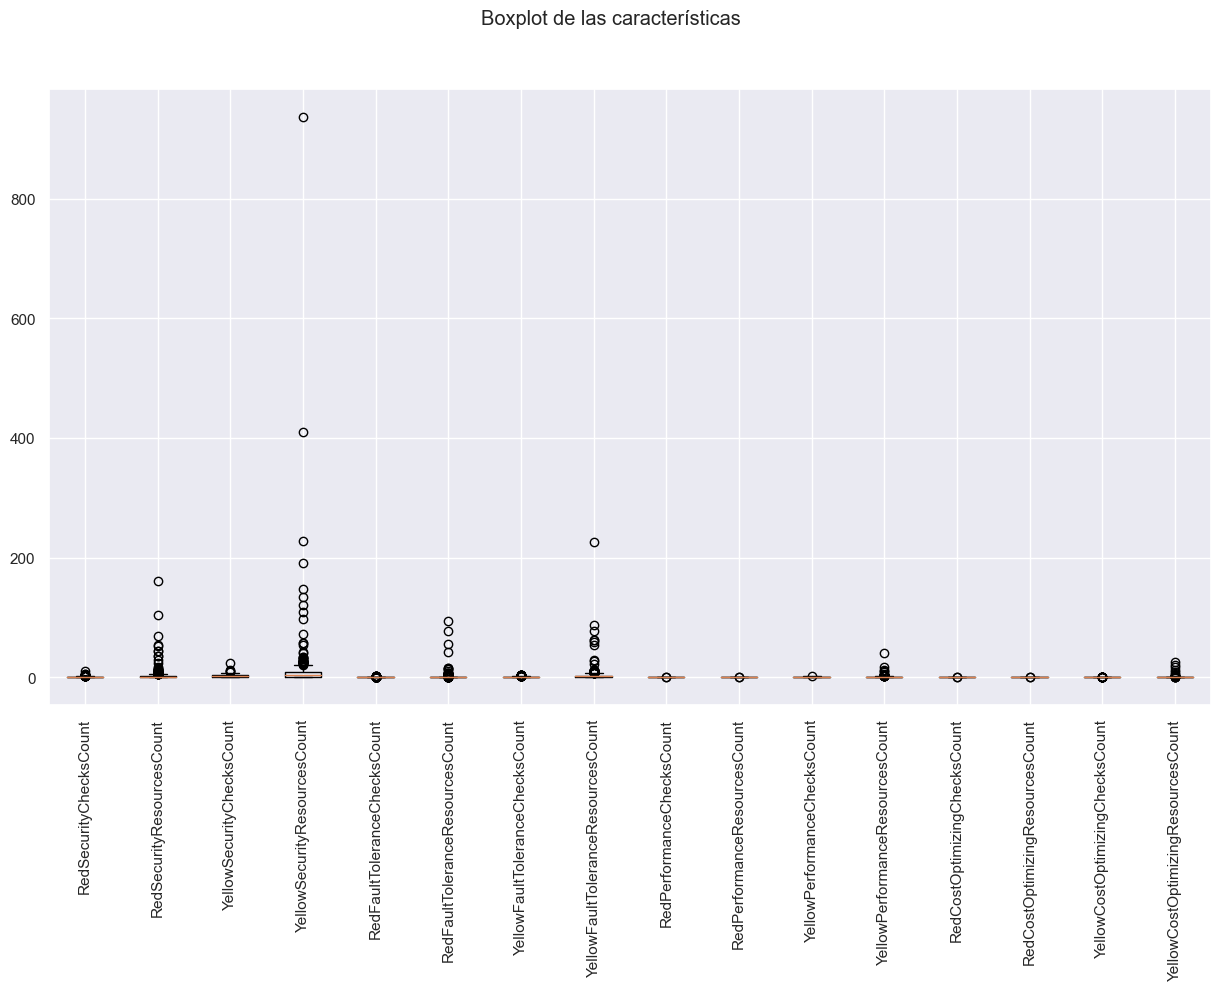

In [169]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Boxplot de las características')
ax = fig.add_subplot(111)
plt.boxplot(df[df.filter(regex='^Red|Yellow').columns])
ax.set_xticklabels(df[df.filter(regex='^Red|Yellow').columns].columns, rotation=90)
plt.show()

In [60]:
# get features where 75% is zero
features_to_remove = []
for feature in features:
    if df[feature].describe()['75%'] == 0:
        features_to_remove.append(feature)

features_to_remove

['RedFaultToleranceChecksCount',
 'RedFaultToleranceResourcesCount',
 'RedPerformanceChecksCount',
 'RedPerformanceResourcesCount',
 'YellowPerformanceChecksCount',
 'YellowPerformanceResourcesCount',
 'RedCostOptimizingChecksCount',
 'RedCostOptimizingResourcesCount',
 'YellowCostOptimizingChecksCount',
 'YellowCostOptimizingResourcesCount']

Hay muchas caracteristicas con más del 75% de los datos en cero, esto puede generar mucho ruido al modelo por lo que deben tratarse. Estas marcas en cero corresponden a aplicaciones que no cuentan con checks en rojo o amarillo para el pilar definido. 
<br> Vamos a separa un dataframe por pilar para ver el comportamiento de los datos.

## Separación por pilar Security

In [168]:
# general features
df_accounts = df.filter(regex='Account')
df_resources = df.filter(regex='(Full|Dev|Qa|Pdn)ResourcesCount')
# create dataframe only with columns that contains SecurityChecksCount in the name
df_sec = df.filter(regex='Security')
#df_sec = pd.concat([df['applicationcode'], df_resources, df_accounts, df_sec], axis=1)
# enfocandose en solo produccion
df_sec = pd.concat([df['applicationcode'], df['PdnResourcesCount'], df['PdnAccountsCount'], df_sec], axis=1)

df_sec

,applicationcode,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount
0,app00609,182,1,2,3,5,12
2,app00610,92,3,1,1,5,11
3,app00614,27,1,1,1,4,11
4,app00612,74,2,0,0,2,2
5,app00616,2,1,0,0,0,0
...,...,...,...,...,...,...,...
906,app00657,47,1,0,0,1,1
907,app00655,14,1,0,0,0,0
908,app00661,24,1,1,1,4,11
909,app00658,31,2,2,4,7,10


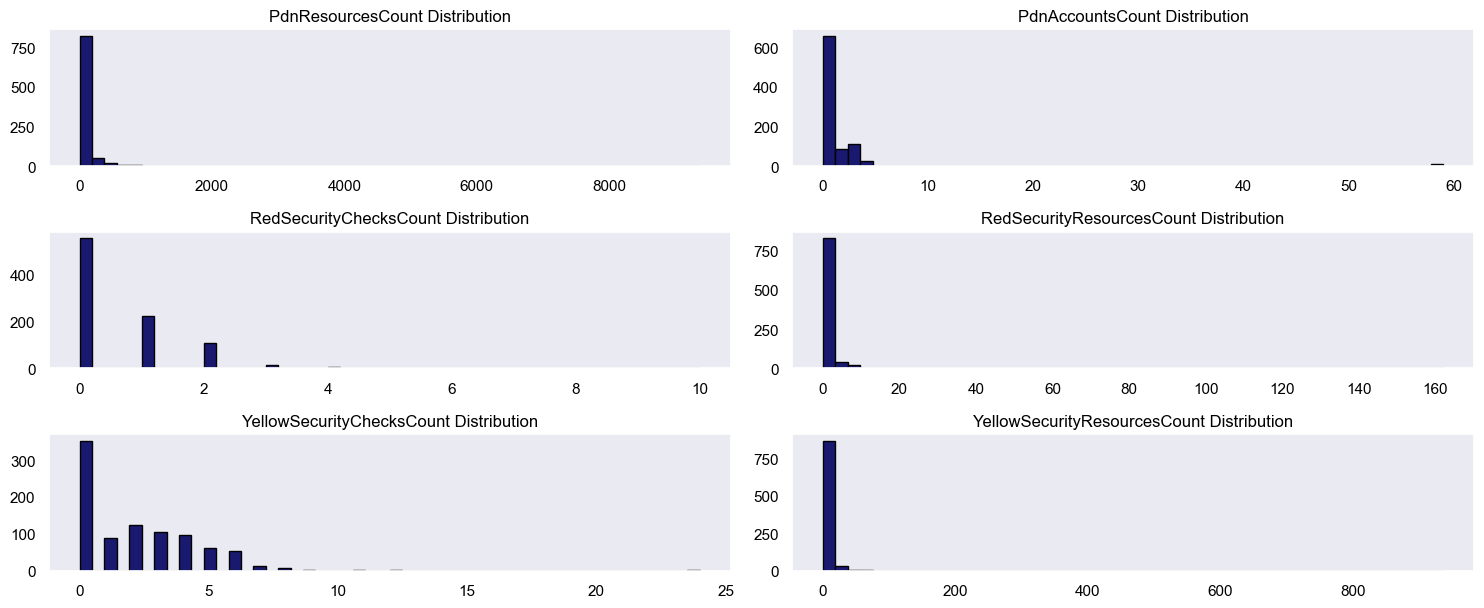

In [85]:
sec_features = df_sec.columns.to_list()
sec_features.remove('applicationcode')
draw_histograms(df_sec, sec_features, 4, 2)

Para las aplicaciones que no tienen checks los campos ChecksCount y ResourceCount serán igual a cero. Dicho de otra manera, si el ChecksCount es cero, el ResourceCount también lo será. Por lo tanto, se van a eliminar todas las aplicaciones cuyos checks de seguridad son cero, dado que no interesan para el análisis de las aplicaciones con checks de seguridad.

In [86]:
# count zeros for every column
(df_sec == 0).sum()/len(df_sec) * 100

applicationcode                  0.000000
PdnResourcesCount               25.219298
PdnAccountsCount                25.219298
RedSecurityChecksCount          60.635965
RedSecurityResourcesCount       60.635965
YellowSecurityChecksCount       38.706140
YellowSecurityResourcesCount    38.706140
dtype: float64

In [87]:
# remove rows where YellowSecurityChecksCount is zero
print(df_sec.shape)
df_sec = df_sec[df_sec['YellowSecurityChecksCount'] != 0]
df_sec = df_sec[df_sec['RedSecurityChecksCount'] != 0]

print(df_sec.shape)


(912, 7)
(353, 7)


Quedán 353 aplicaciones después de realizar el filtro, vamos a ver el histograma para ver la nueva distribución.

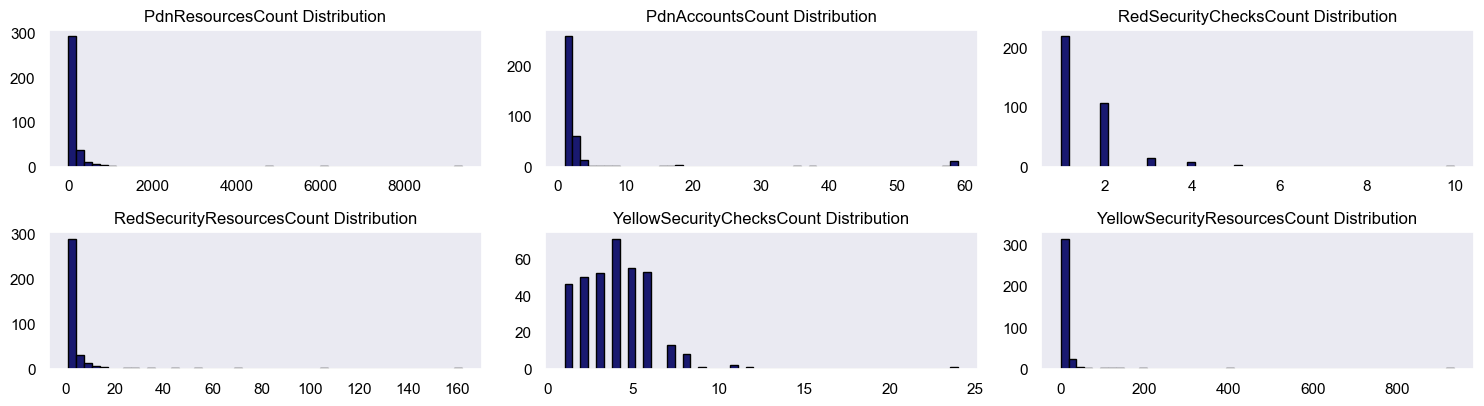

In [88]:
draw_histograms(df_sec, sec_features, 4, 3)

In [89]:
df_sec.describe()

,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,175.784703,3.943343,1.504249,4.359773,3.968839,14.895184
std,653.438157,10.681982,0.863140,12.354759,2.239025,56.793364
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,1.000000,1.000000,2.000000,3.000000
50%,77.000000,1.000000,1.000000,2.000000,4.000000,7.000000
75%,136.000000,3.000000,2.000000,3.000000,5.000000,12.000000
max,9369.000000,59.000000,10.000000,162.000000,24.000000,936.000000


Algunos diagramas de correlación entre variables

C:\Users\fede_\AppData\Local\Temp\ipykernel_24148\968516648.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sec.corr(), annot=True, cmap="YlGnBu")


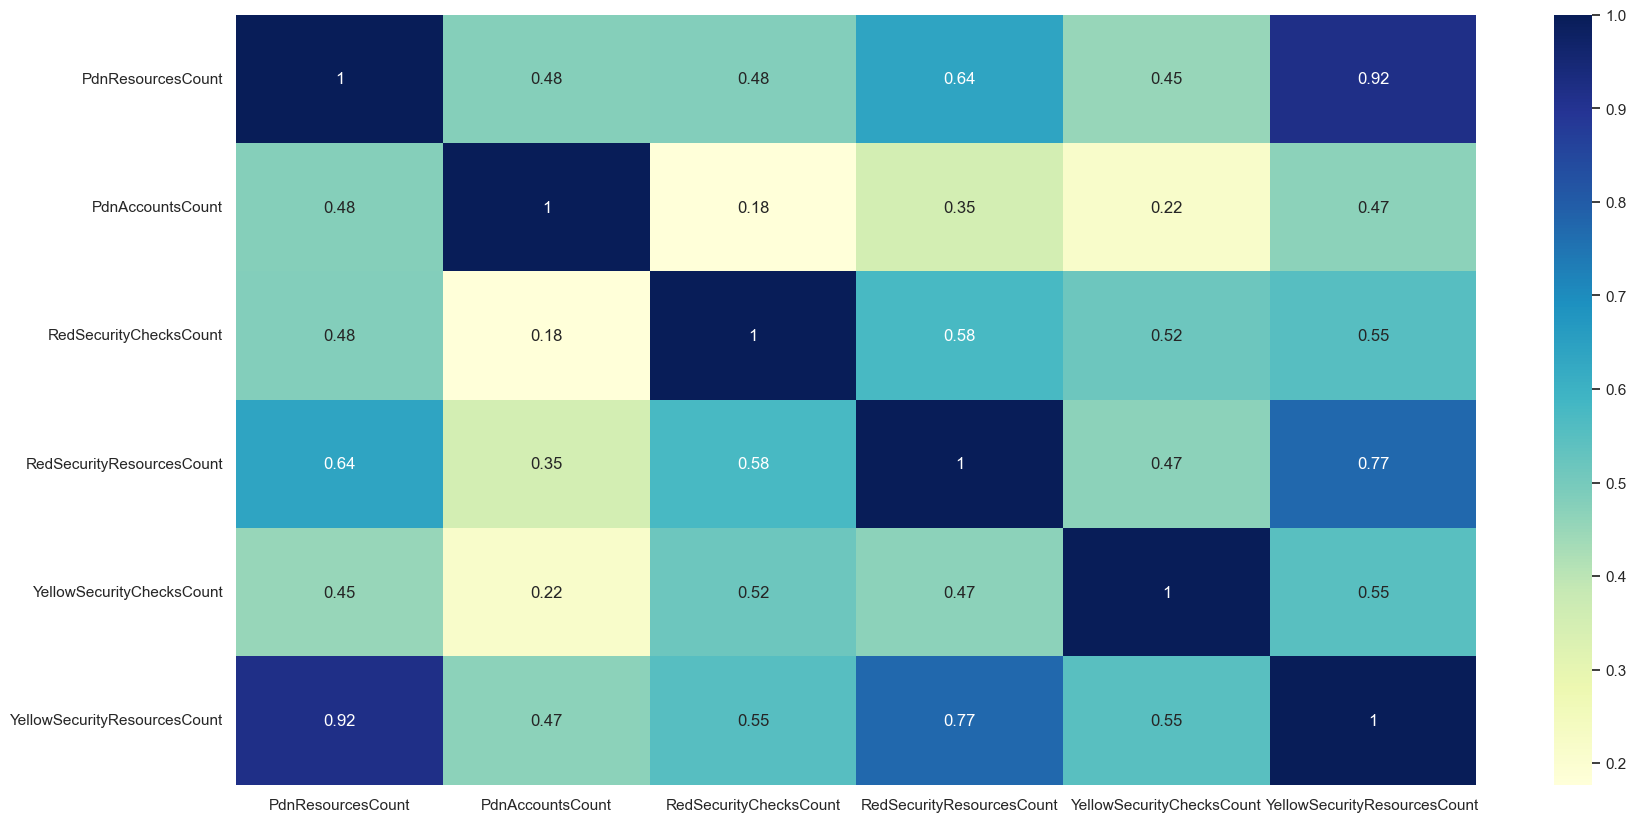

In [90]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_sec.corr(), annot=True, cmap="YlGnBu")
plt.show()


Conclusiones aquí:
- Hay una correlación entre el conteo de recursos con checks amarillo y la cantidad de recursos por aplicación en Pdn. Es decir, la mayoria de aplicaciones en producción, tienen recursos con checks de riesgo medio.
- Hay una correlación entre los checks rojos y los checks amarillos para una aplicación.
- La información de las cuentas `PdnAccountsCount` donde esta desplegada la aplicación, no tiene mucha relación con los checks de seguridad marcados.


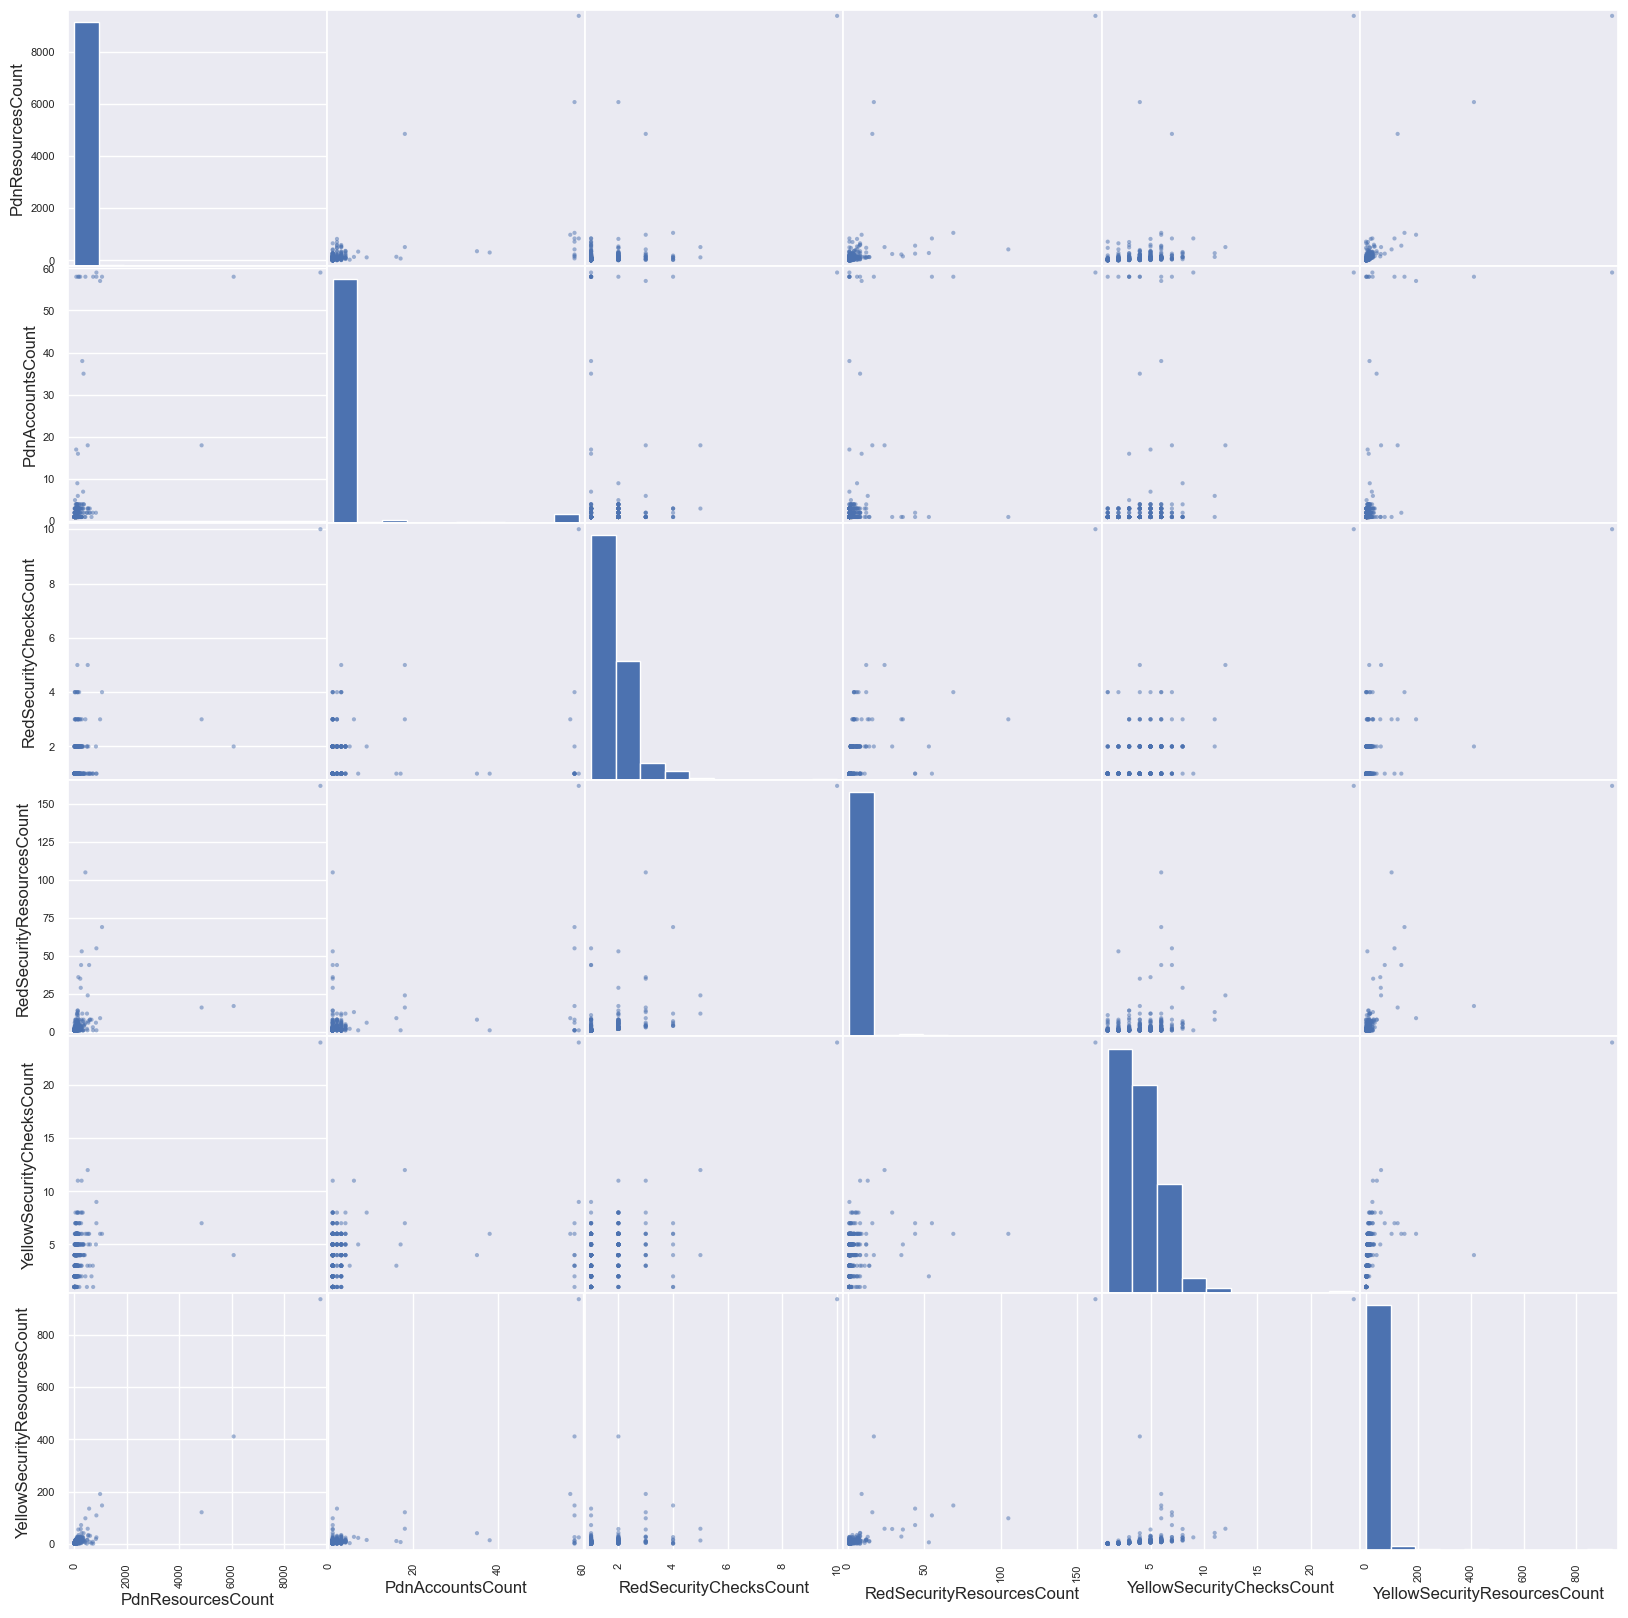

In [91]:
# scatterplot matrix
scatter_matrix(df_sec, figsize=(20, 20))
plt.show()

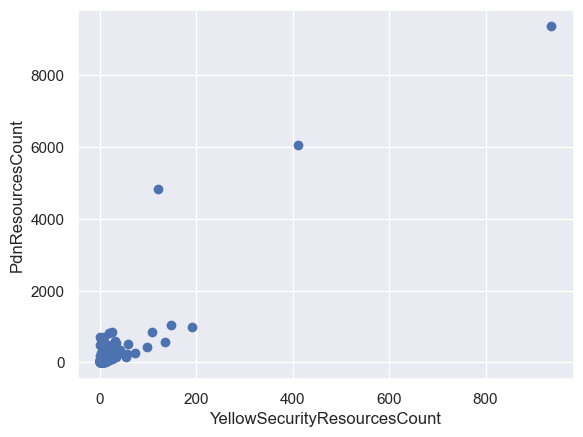

In [94]:
# scatterplot between YellowSecurityResourcesCount and PdnResourcesCount
plt.scatter(df_sec['YellowSecurityResourcesCount'], df_sec['PdnResourcesCount'])
plt.xlabel('YellowSecurityResourcesCount')
plt.ylabel('PdnResourcesCount')
plt.show()

Ejecutemos una clusterización solo para los checks de seguridad

In [99]:
df_sec

,applicationcode,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount
0,app00609,182,1,2,3,5,12
2,app00610,92,3,1,1,5,11
3,app00614,27,1,1,1,4,11
8,app00586,839,59,1,1,9,25
9,app00587,42,1,1,1,7,14
...,...,...,...,...,...,...,...
903,app00089,30,1,1,2,1,2
904,app00659,481,2,2,12,6,15
908,app00661,24,1,1,1,4,11
909,app00658,31,2,2,4,7,10


In [103]:
# normalize data
scaler = StandardScaler()
df_sec_scaled = scaler.fit_transform(df_sec.drop(columns=['applicationcode']))
# index to keep the index of df_sec
df_sec_scaled = pd.DataFrame(df_sec_scaled, columns=df_sec.drop(columns=['applicationcode']).columns, index=df_sec.index)
#concat df_sec_scaled with applicationcode
df_sec_scaled = pd.concat([df_sec['applicationcode'], df_sec_scaled], axis=1)
df_sec_scaled

,applicationcode,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount
0,app00609,0.009525,-0.275934,0.575173,-0.110217,0.461194,-0.051050
2,app00610,-0.128403,-0.088437,-0.585033,-0.272328,0.461194,-0.068683
3,app00614,-0.228018,-0.275934,-0.585033,-0.272328,0.013937,-0.068683
8,app00586,1.016403,5.161477,-0.585033,-0.272328,2.250222,0.178175
9,app00587,-0.205030,-0.275934,-0.585033,-0.272328,1.355708,-0.015784
...,...,...,...,...,...,...,...
903,app00089,-0.223421,-0.275934,-0.585033,-0.191272,-1.327834,-0.227377
904,app00659,0.467754,-0.182185,0.575173,0.619281,0.908451,0.001848
908,app00661,-0.232616,-0.275934,-0.585033,-0.272328,0.013937,-0.068683
909,app00658,-0.221888,-0.182185,0.575173,-0.029162,1.355708,-0.086315


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='RedSecurityChecksCount', ylabel='RedSecurityResourcesCount'>

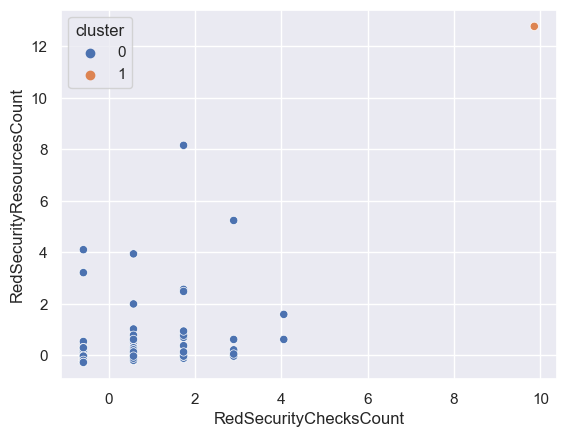

In [111]:
# kmeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_sec_scaled.drop(columns=['applicationcode']))
kmeans.labels_

# add cluster column to df_sec_scaled
df_sec_scaled['cluster'] = kmeans.labels_
df_sec_scaled

# get cluster 0
df_cluster_0 = df_sec_scaled[df_sec_scaled['cluster'] == 0]
df_cluster_0

# get cluster 1
df_cluster_1 = df_sec_scaled[df_sec_scaled['cluster'] == 1]
df_cluster_1

# plot cluster 0
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df_sec_scaled, x="RedSecurityChecksCount", y="RedSecurityResourcesCount", hue="cluster", palette="deep")

In [112]:
# analize clusters
df_cluster_0.describe()



,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,cluster
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.0
mean,-0.040025,-0.014663,-0.028002,-0.036300,-0.025452,-0.046141,0.0
std,0.662244,0.964149,0.853295,0.734322,0.881120,0.502026,0.0
min,-0.267864,-0.275934,-0.585033,-0.272328,-1.327834,-0.245009,0.0
25%,-0.221888,-0.275934,-0.585033,-0.272328,-0.880577,-0.209744,0.0
50%,-0.152158,-0.275934,-0.585033,-0.191272,0.013937,-0.139213,0.0
75%,-0.060972,-0.088437,0.575173,-0.110217,0.461194,-0.051050,0.0
max,9.025452,5.161477,4.055789,8.157430,3.591993,6.984391,0.0


In [113]:
df_cluster_1.describe()

,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,cluster
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0
mean,14.088961,5.161477,9.856816,12.777585,8.959078,16.24155,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,14.088961,5.161477,9.856816,12.777585,8.959078,16.24155,1.0
25%,14.088961,5.161477,9.856816,12.777585,8.959078,16.24155,1.0
50%,14.088961,5.161477,9.856816,12.777585,8.959078,16.24155,1.0
75%,14.088961,5.161477,9.856816,12.777585,8.959078,16.24155,1.0
max,14.088961,5.161477,9.856816,12.777585,8.959078,16.24155,1.0


In [114]:
# export to csv
df_sec_scaled.to_csv('df_sec_clusters.csv', index=False)

Genero un cluster con un elemento, debido a que es un atípico y no se encontraron más vecinos en el algoritmo. Rapidamente se podría inferir que los dos grupos aquí corresponden a aplicaciones con muchos (más de 5) checks de seguridad y aplicaciones con pocos (menos de 5) checks de seguridad. 
<br> Probemos con eliminación de atípicos.

In [115]:
df_sec.describe()

,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,175.784703,3.943343,1.504249,4.359773,3.968839,14.895184
std,653.438157,10.681982,0.863140,12.354759,2.239025,56.793364
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,1.000000,1.000000,2.000000,3.000000
50%,77.000000,1.000000,1.000000,2.000000,4.000000,7.000000
75%,136.000000,3.000000,2.000000,3.000000,5.000000,12.000000
max,9369.000000,59.000000,10.000000,162.000000,24.000000,936.000000


In [116]:
# remove outliers from df_sec
print(df_sec.shape)
df_sec = df_sec[df_sec['RedSecurityChecksCount'] < 10]
df_sec = df_sec[df_sec['YellowSecurityChecksCount'] < 10]
print(df_sec.shape)

(353, 7)
(349, 7)


In [117]:
df_sec.describe()

,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,148.335244,3.747851,1.464183,3.816619,3.848138,12.020057
std,433.500440,10.298673,0.708735,9.018223,1.853043,28.431853
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,1.000000,1.000000,2.000000,3.000000
50%,76.000000,1.000000,1.000000,2.000000,4.000000,7.000000
75%,135.000000,3.000000,2.000000,3.000000,5.000000,12.000000
max,6065.000000,59.000000,5.000000,105.000000,9.000000,411.000000


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='RedSecurityChecksCount', ylabel='RedSecurityResourcesCount'>

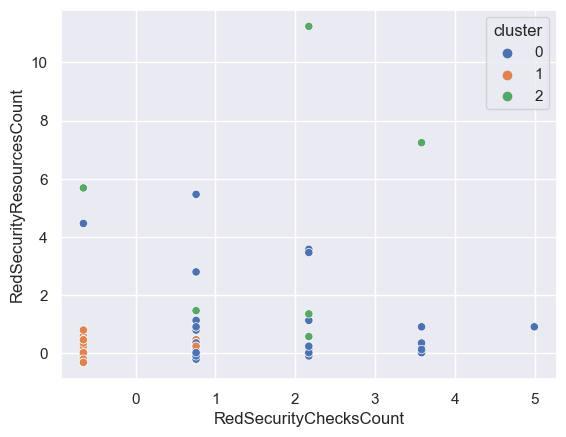

In [127]:
# run kmeans again 
# normalize data
scaler = StandardScaler()
df_sec_scaled = scaler.fit_transform(df_sec.drop(columns=['applicationcode']))
# index to keep the index of df_sec
df_sec_scaled = pd.DataFrame(df_sec_scaled, columns=df_sec.drop(columns=['applicationcode']).columns, index=df_sec.index)
#concat df_sec_scaled with applicationcode
df_sec_scaled = pd.concat([df_sec['applicationcode'], df_sec_scaled], axis=1)

# kmeans with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_sec_scaled.drop(columns=['applicationcode']))

# add cluster column to df_sec_scaled
df_sec_scaled['cluster'] = kmeans.labels_

# get cluster 0
df_cluster_0 = df_sec_scaled[df_sec_scaled['cluster'] == 0]

# get cluster 1
df_cluster_1 = df_sec_scaled[df_sec_scaled['cluster'] == 1]

# plot cluster 0
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df_sec_scaled, x="RedSecurityChecksCount", y="RedSecurityResourcesCount", hue="cluster", palette="deep")


De esta manera los clusters son mucho más variados y complejos de explicar. Aquí el desafio es la interpretabilidad. Este proceso debería hacerse para cada uno de los pilares. De aquí se extraen unos grupos, que pueden ser utilizados para entrenar un modelo de clasificación o se puede hacer una nueva clusterización.

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


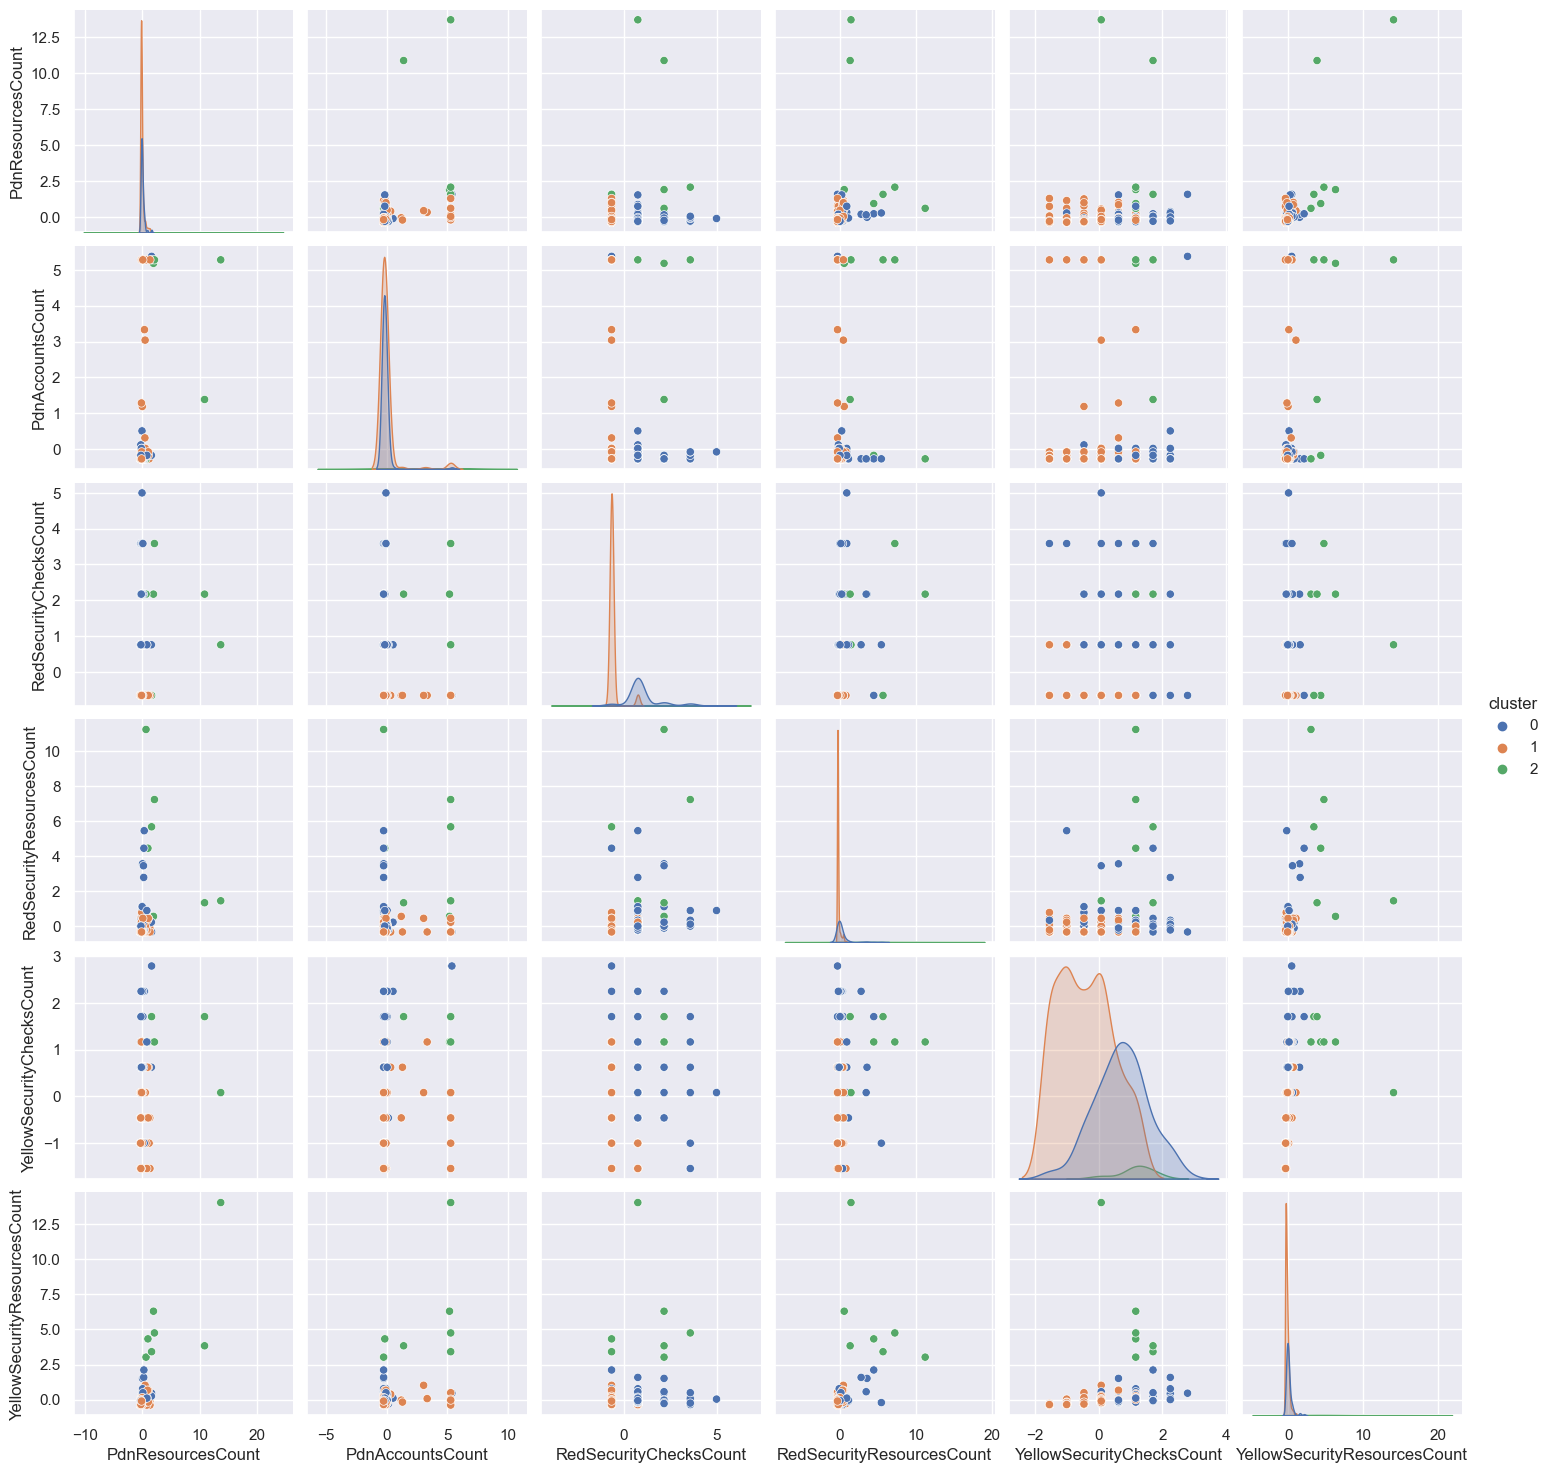

In [128]:
# scatter_matrix using sns
sns.pairplot(df_sec_scaled, hue="cluster", palette="deep")
plt.show()

Los grupos que se forman por el conteo de recursos marcados `RedSecurityResourcesCount` y `YellowSecurityResourcesCount` muestran que se generan 3 grupos: uno con pocos recursos con checks, otro con muchos recursos con checks y otro con una cantidad intermedia de recursos con checks. Las variables de ChecksCount creo que no aporta mucho, porque poco importa si una aplicación tiene 2 o 10 checks de seguridad, lo que importa es la cantidad de recursos con checks de seguridad... la cantidad de diferentes checks marcados podría ser más una desviación.

In [129]:
# export to csv
df_sec_scaled.to_csv('df_sec_clusters3.csv', index=False)

In [130]:
# concat df_sec with clusters
df_sec = pd.concat([df_sec, df_sec_scaled['cluster']], axis=1)
df_sec


,applicationcode,PdnResourcesCount,PdnAccountsCount,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,cluster
0,app00609,182,1,2,3,5,12,0
2,app00610,92,3,1,1,5,11,1
3,app00614,27,1,1,1,4,11,1
8,app00586,839,59,1,1,9,25,0
9,app00587,42,1,1,1,7,14,0
...,...,...,...,...,...,...,...,...
903,app00089,30,1,1,2,1,2,1
904,app00659,481,2,2,12,6,15,0
908,app00661,24,1,1,1,4,11,1
909,app00658,31,2,2,4,7,10,0


In [131]:
# export csv
df_sec.to_csv('df_sec.csv', index=False)



## Cluster con k 5, solo checks
Vamos a hacer una clusterización teniendo en cuenta unicamente los checks.
- Solo datos de producción (682)
- Se ignora conteo de recursos y conteo de cuentas de la aplicación.
- Detección de atípicos
- KMeans con 3 y 5 clusters

In [133]:
# remove from df those with 0 in PdnResourcesCount
print(df.shape)
df = df[df['PdnResourcesCount'] != 0]
print(df.shape)

(912, 25)
(682, 25)


In [134]:
# create dataframe only with columns that contains SecurityChecksCount in the name
df_checks = df.filter(regex='(Security|FaultTolerance|Performance|CostOptimizing)')
#df_sec = pd.concat([df['applicationcode'], df_resources, df_accounts, df_sec], axis=1)
# enfocandose en solo produccion
df_checks = pd.concat([df['applicationcode'], df_checks], axis=1)

df_checks

,applicationcode,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,RedFaultToleranceChecksCount,RedFaultToleranceResourcesCount,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount
0,app00609,2,3,5,12,0,0,2,5,0,0,1,1,0,0,0,0
2,app00610,1,1,5,11,1,1,1,2,0,0,0,0,0,0,0,0
3,app00614,1,1,4,11,0,0,1,1,0,0,1,1,0,0,0,0
4,app00612,0,0,2,2,1,1,3,9,0,0,0,0,0,0,0,0
5,app00616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,app00657,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
907,app00655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
908,app00661,1,1,4,11,0,0,3,5,0,0,0,0,0,0,0,0
909,app00658,2,4,7,10,0,0,1,2,0,0,1,1,0,0,0,0


In [135]:
df_checks.describe()

,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,RedFaultToleranceChecksCount,RedFaultToleranceResourcesCount,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.790323,2.272727,2.802053,9.611437,0.142229,0.791789,0.972141,3.290323,0.002933,0.002933,0.296188,0.507331,0.002933,0.002933,0.026393,0.164223
std,0.974729,9.143920,2.271019,42.193980,0.385500,5.598200,0.903957,10.999701,0.054113,0.054113,0.539443,1.972819,0.054113,0.054113,0.160419,1.552605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,4.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,4.000000,8.750000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,162.000000,24.000000,936.000000,3.000000,95.000000,4.000000,227.000000,1.000000,1.000000,3.000000,41.000000,1.000000,1.000000,1.000000,25.000000


In [136]:
# normalize data
scaler = StandardScaler()
df_checks_scaled = scaler.fit_transform(df_checks.drop(columns=['applicationcode']))
# index to keep the index of df_sec
df_checks_scaled = pd.DataFrame(df_checks_scaled, columns=df_checks.drop(columns=['applicationcode']).columns, index=df_checks.index)
#concat df_sec_scaled with applicationcode
df_checks_scaled = pd.concat([df_checks['applicationcode'], df_checks_scaled], axis=1)
df_checks_scaled

,applicationcode,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,RedFaultToleranceChecksCount,RedFaultToleranceResourcesCount,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount
0,app00609,1.241950,0.079595,0.968534,0.056651,-0.369217,-0.14154,1.137902,0.155544,-0.054233,-0.054233,1.305660,0.249911,-0.054233,-0.054233,-0.164646,-0.10585
2,app00610,0.215271,-0.139291,0.968534,0.032933,2.226718,0.03722,0.030842,-0.117391,-0.054233,-0.054233,-0.549465,-0.257349,-0.054233,-0.054233,-0.164646,-0.10585
3,app00614,0.215271,-0.139291,0.527880,0.032933,-0.369217,-0.14154,0.030842,-0.208370,-0.054233,-0.054233,1.305660,0.249911,-0.054233,-0.054233,-0.164646,-0.10585
4,app00612,-0.811408,-0.248733,-0.353428,-0.180524,2.226718,0.03722,2.244961,0.519457,-0.054233,-0.054233,-0.549465,-0.257349,-0.054233,-0.054233,-0.164646,-0.10585
5,app00616,-0.811408,-0.248733,-1.234736,-0.227959,-0.369217,-0.14154,-1.076218,-0.299348,-0.054233,-0.054233,-0.549465,-0.257349,-0.054233,-0.054233,-0.164646,-0.10585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,app00657,-0.811408,-0.248733,-0.794082,-0.204241,-0.369217,-0.14154,-1.076218,-0.299348,-0.054233,-0.054233,-0.549465,-0.257349,-0.054233,-0.054233,-0.164646,-0.10585
907,app00655,-0.811408,-0.248733,-1.234736,-0.227959,-0.369217,-0.14154,-1.076218,-0.299348,-0.054233,-0.054233,-0.549465,-0.257349,-0.054233,-0.054233,-0.164646,-0.10585
908,app00661,0.215271,-0.139291,0.527880,0.032933,-0.369217,-0.14154,2.244961,0.155544,-0.054233,-0.054233,-0.549465,-0.257349,-0.054233,-0.054233,-0.164646,-0.10585
909,app00658,1.241950,0.189037,1.849843,0.009216,-0.369217,-0.14154,0.030842,-0.117391,-0.054233,-0.054233,1.305660,0.249911,-0.054233,-0.054233,-0.164646,-0.10585


In [159]:
# run kmens with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=232).fit(df_checks_scaled.drop(columns=['applicationcode']))

# add cluster column to df_sec_scaled
df_checks_scaled['cluster'] = kmeans.labels_

# concat with df_checks
df_checks = pd.concat([df_checks, df_checks_scaled['cluster']], axis=1)

df_checks

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,applicationcode,RedSecurityChecksCount,RedSecurityResourcesCount,YellowSecurityChecksCount,YellowSecurityResourcesCount,RedFaultToleranceChecksCount,RedFaultToleranceResourcesCount,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount,cluster,cluster,cluster
0,app00609,2,3,5,12,0,0,2,5,0,0,1,1,0,0,0,0,0,4,3
2,app00610,1,1,5,11,1,1,1,2,0,0,0,0,0,0,0,0,0,4,3
3,app00614,1,1,4,11,0,0,1,1,0,0,1,1,0,0,0,0,0,4,3
4,app00612,0,0,2,2,1,1,3,9,0,0,0,0,0,0,0,0,1,0,1
5,app00616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,app00657,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
907,app00655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
908,app00661,1,1,4,11,0,0,3,5,0,0,0,0,0,0,0,0,0,4,3
909,app00658,2,4,7,10,0,0,1,2,0,0,1,1,0,0,0,0,0,4,3


In [160]:
# count of clusters
df_checks_scaled['cluster'].value_counts()


1    436
3    233
0      9
2      2
4      2
Name: cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


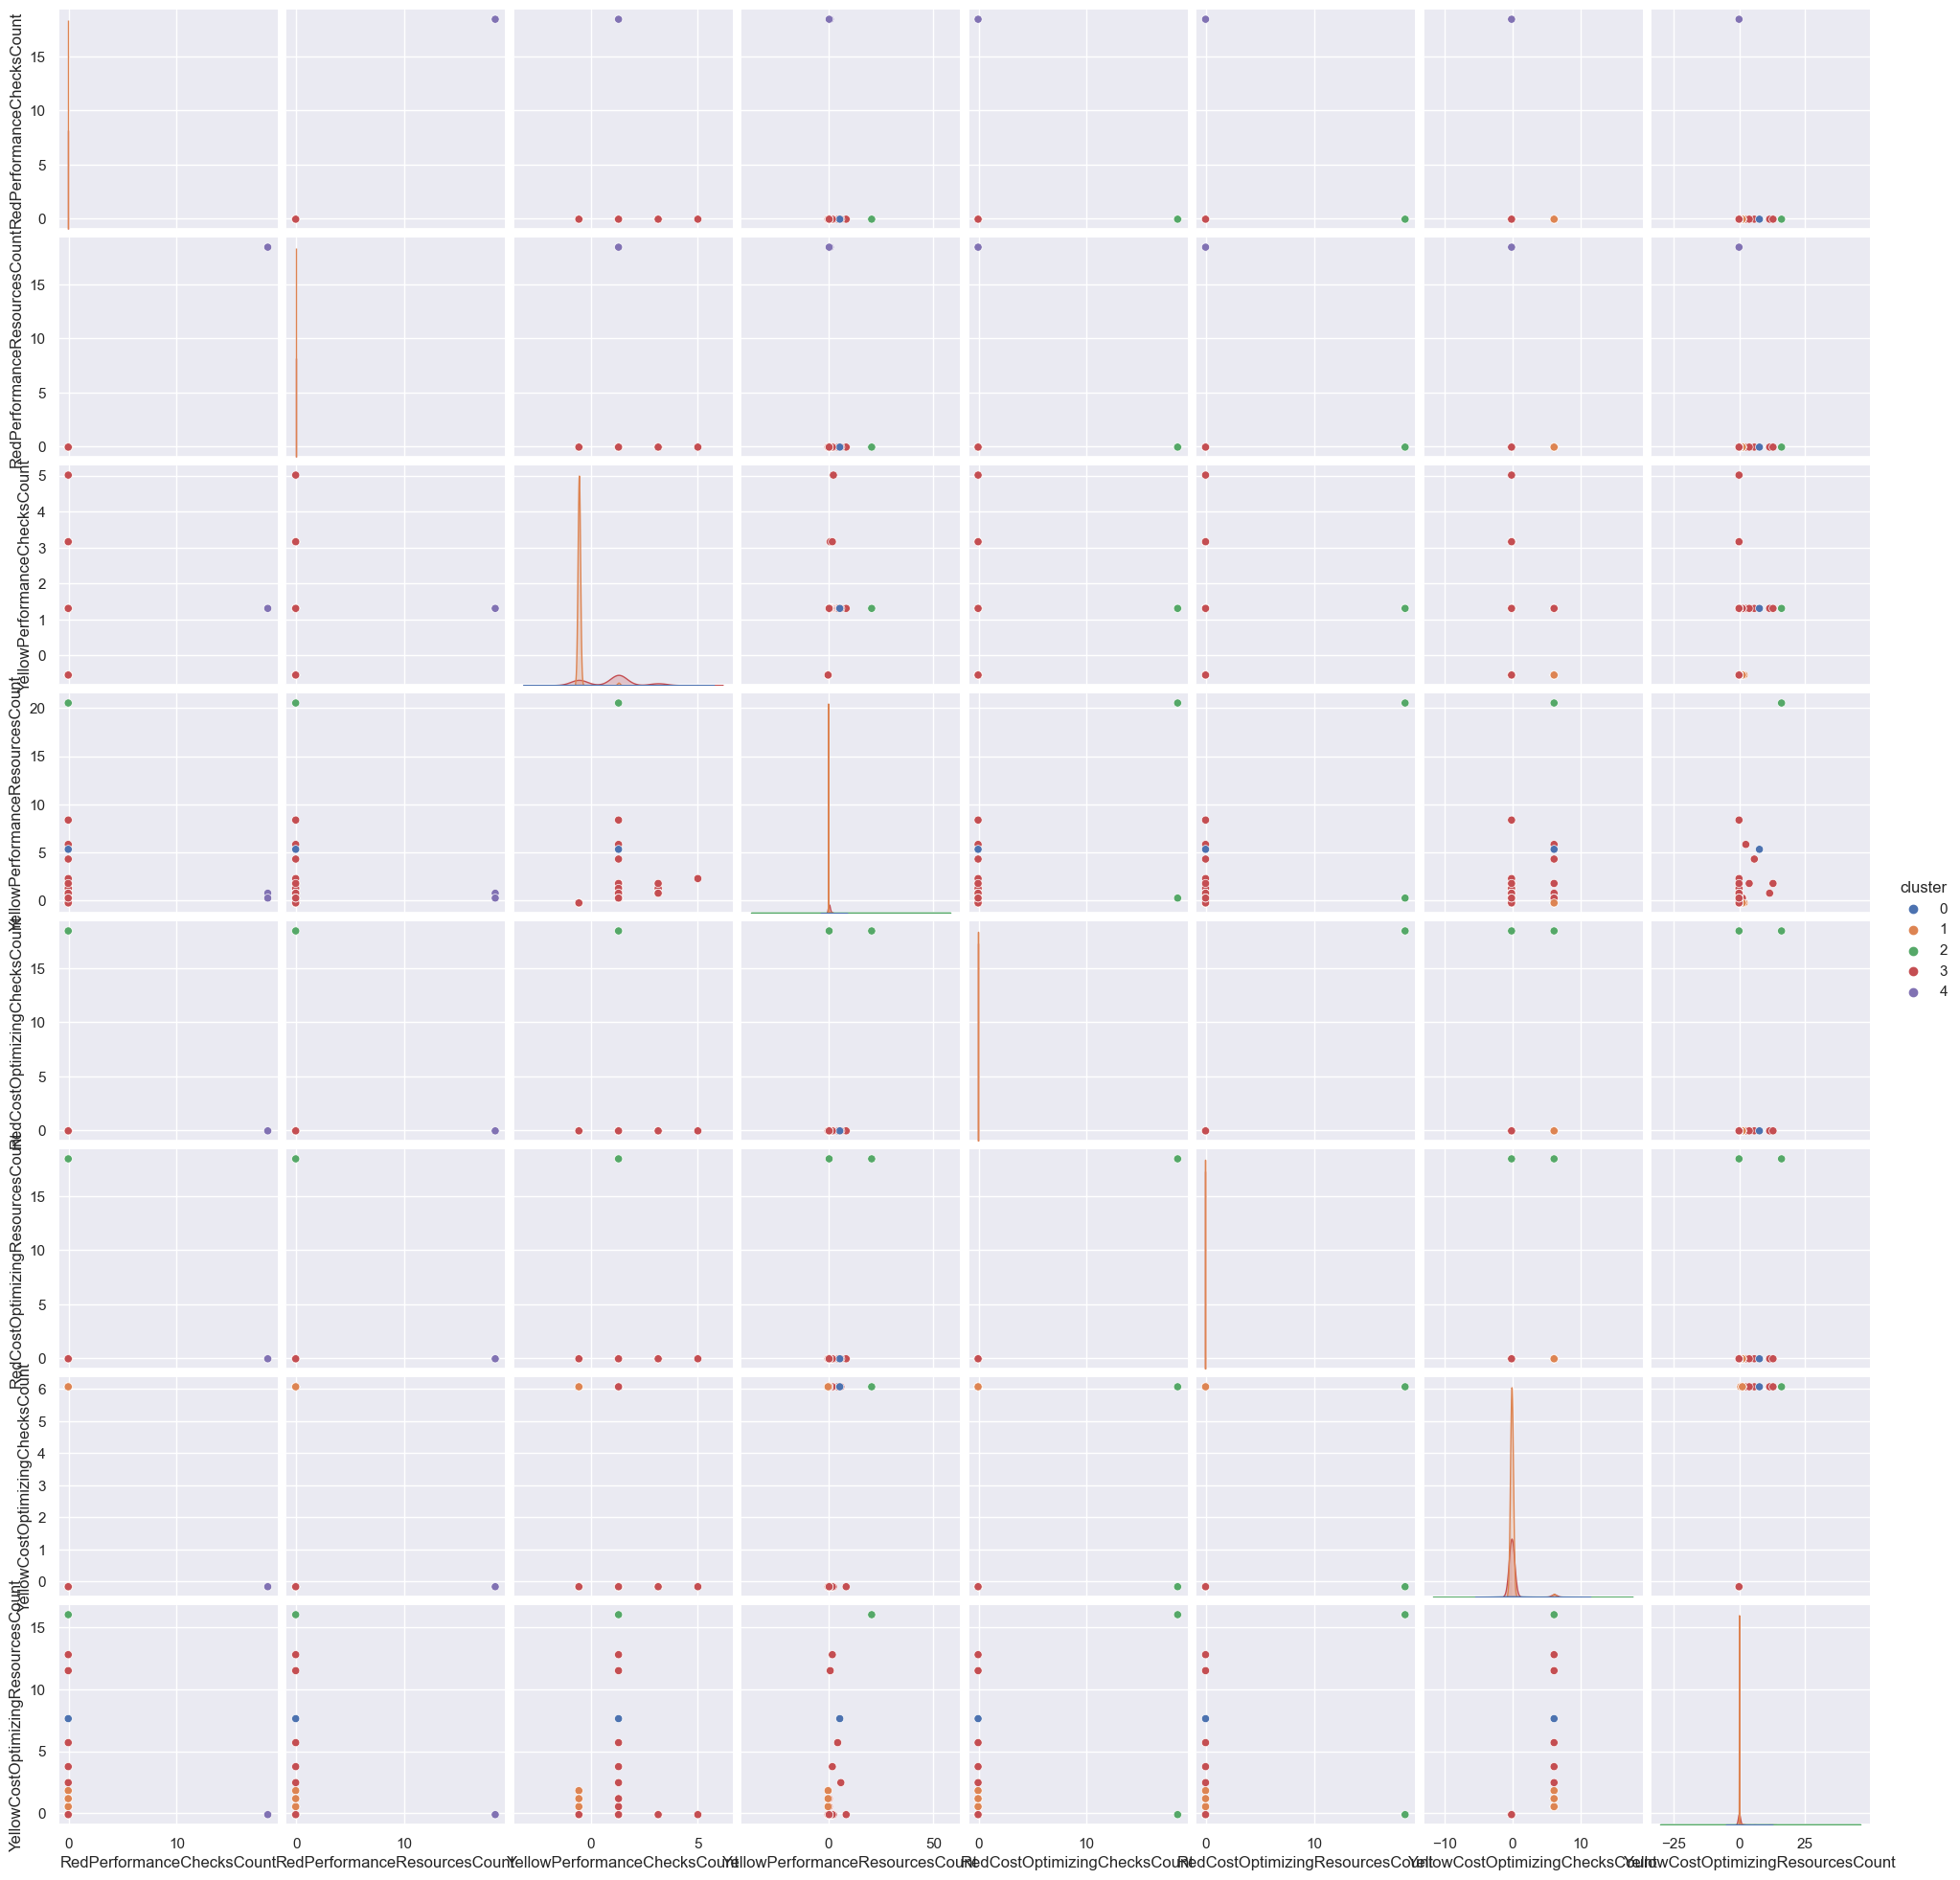

In [167]:
#scatter_matrix using sns
sns.pairplot(df_checks_scaled[df_checks_scaled.filter(regex='CostOptimizing|Performance|cluster').columns], hue="cluster", palette="deep")
plt.show()


El cluster 2 se ve relevante para los pilares CostOptimizing y Performance. El cluster 1 es de aplicaciones con menos checks (entonces mayor nivel de madurez?), el cluster 3 es con algunos checks, y el cluster 0 se lleva los atípicos o aplicaciones con muchos checks. El cluster 4 se ve relevante para el pilar de Performance.

### Paso 3

In [8]:
# Paso 3 - Normalización de datos
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [9]:
df

,application_id,organization_id,provider_id,snapshot_date_id,applicationcode,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,...,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount,ppn_tm
0,609,1,1,20231012,app00609,701,352,167,182,4,...,0.264201,-0.046881,-0.046881,1.609932,0.361045,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
1,613,1,1,20231012,app00613,139,90,49,0,3,...,-0.255987,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
2,610,1,1,20231012,app00610,193,60,41,92,5,...,-0.047912,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
3,614,1,1,20231012,app00614,79,29,23,27,3,...,-0.151950,-0.046881,-0.046881,1.609932,0.361045,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
4,612,1,1,20231012,app00612,357,176,107,74,4,...,0.680351,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,655,1,1,20231012,app00655,57,28,15,14,3,...,-0.255987,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
908,661,1,1,20231012,app00661,73,25,24,24,3,...,0.264201,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
909,658,1,1,20231012,app00658,252,126,95,31,4,...,-0.047912,-0.046881,-0.046881,1.609932,0.361045,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
910,656,1,1,20231012,app00656,41,41,0,0,5,...,-0.255987,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008


### Paso 4

In [10]:
# Paso 4 - Elección del número de clústeres (K)
# Asuminos que sabemos el número de clústeres 4
K = 5

### Paso 5

In [11]:
# Paso 5 - Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: xlabel='RedSecurityChecksCount', ylabel='RedSecurityResourcesCount'>

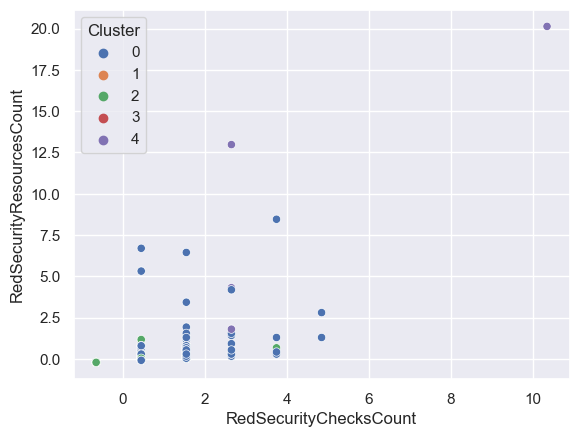

In [13]:
# Paso 6 - Visualización de los resultados
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="RedSecurityChecksCount", y="RedSecurityResourcesCount", hue="Cluster", palette="deep")

### Paso 6

In [14]:
# Paso 6 - Análisis de resultados
# En este ejemplo, visualizaremos los clústeres.
plt.scatter(df_r['Caracteristica1'], df_r['Caracteristica2'], c=df_r['Cluster'], cmap='viridis')
plt.xlabel('Caracteristica1')
plt.xlabel('Caracteristica2')
plt.title('Agrupación de aplicaciones')
plt.show()

NameError: name 'df_r' is not defined

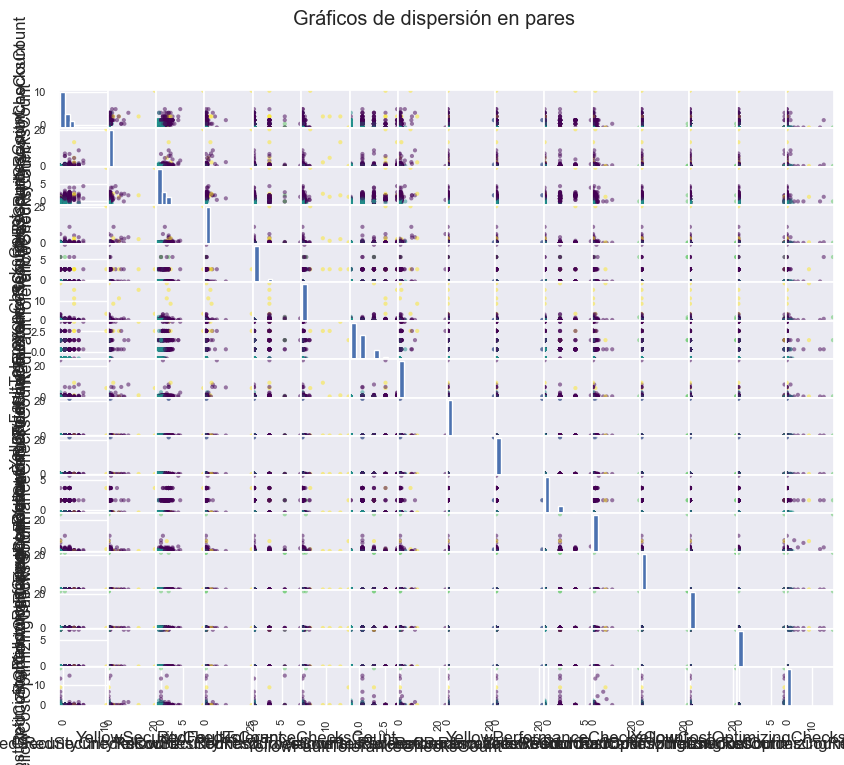

In [15]:
# Paso 6A - Gráfico de disperción en pares
# Utiliza todas las características, 5 en este ejemplo
scatter_matrix(df[features], alpha=0.5, figsize=(10,8), c=df['Cluster'], cmap='viridis', diagonal='hist')
plt.suptitle('Gráficos de dispersión en pares')
plt.show()

### Paso 7

In [16]:
# Paso 7 - Aignación de categorias (manualmente).
# En este ejemplo, asignaremos manualmente etiquetas a los clústeres.
categorias = {
                0: 'Categoría A',
                1: 'Categoría B',
                2: 'Categoría C',
                3: 'Categoría D',
                4: 'Categoría E',
            }
df['Categoria'] = df['Cluster'].map(categorias)

### Paso 8

In [35]:
# Paso 8 - Validación (no se realiza en este ejemplo de datos de muestra)

In [17]:
# Mostrar el dataframe con las categorías asignadas:
print(df[['applicationcode', 'Categoria']])

    applicationcode    Categoria
0          app00609  Categoría A
1          app00613  Categoría C
2          app00610  Categoría A
3          app00614  Categoría A
4          app00612  Categoría A
..              ...          ...
907        app00655  Categoría C
908        app00661  Categoría A
909        app00658  Categoría A
910        app00656  Categoría C
911        app00660  Categoría A

[912 rows x 2 columns]


### Paso 8.1

La correlación entre cada característica y la variable objetivo (en este caso, el clúster asignado). Las características con una alta correlación positiva o negativa son potencialmente más importantes.

In [18]:
# Paso 9 - Análisis de correlación de características.
correlaciones = df[features + ['Cluster']].corr()

In [20]:
print(correlaciones)

                                    RedSecurityChecksCount  \
RedSecurityChecksCount                            1.000000   
RedSecurityResourcesCount                         0.541841   
YellowSecurityChecksCount                         0.693642   
YellowSecurityResourcesCount                      0.444852   
RedFaultToleranceChecksCount                      0.102025   
RedFaultToleranceResourcesCount                   0.126244   
YellowFaultToleranceChecksCount                   0.357304   
YellowFaultToleranceResourcesCount                0.224355   
RedPerformanceChecksCount                         0.072625   
RedPerformanceResourcesCount                      0.072625   
YellowPerformanceChecksCount                      0.442808   
YellowPerformanceResourcesCount                   0.119586   
RedCostOptimizingChecksCount                     -0.004691   
RedCostOptimizingResourcesCount                  -0.004691   
YellowCostOptimizingChecksCount                   0.003136   
YellowCo

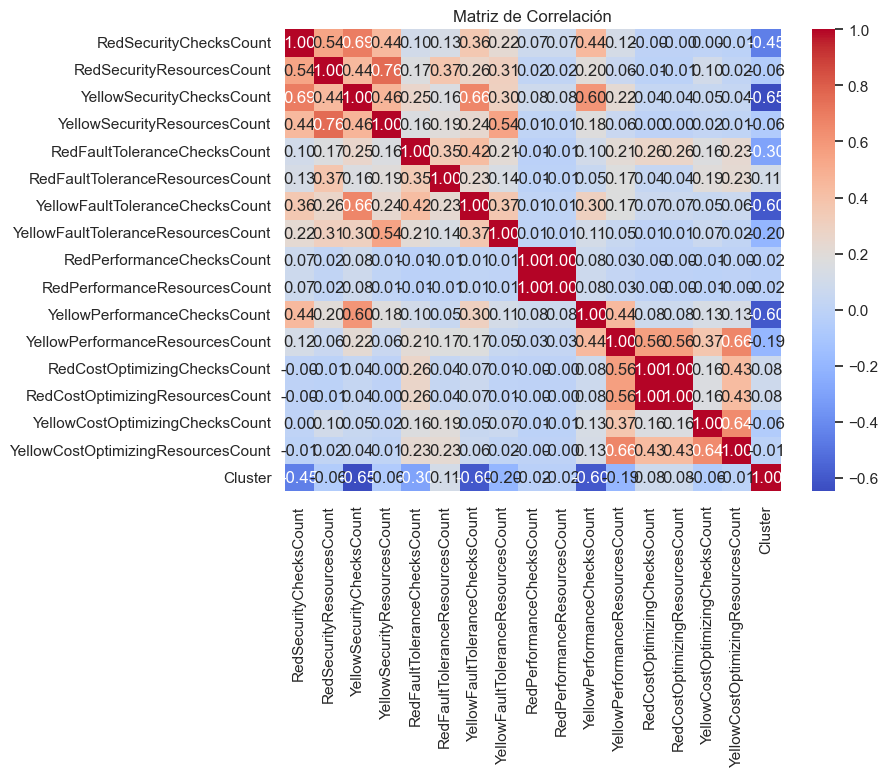

In [19]:
# Crear una visualización de la matriz de correlación utilizando Seaborn
correlation_matrix = correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

En el ejemplo, la característica redsecuritycheckscount, es la única que presenta alguna correlación con el clúster, 0.888, las otras no aportan a la clasificación.

### Paso 8.2

Análisis de varianza.
Realiza un análisis de varianza (ANOVA) para cada característica en relación con la variable objetivo. Esto puede ayudar a identificar si una característica tiene diferencias significativas entre los clústeres.

In [20]:
# Paso 10 - Análisis de varianza
for feature in features:
    grupos = []
    for cluster in range(K):
        grupos.append(df[df['Cluster'] == cluster][feature])
        if len(grupos) > 1:
            f_statistic, p_value = f_oneway(*grupos)
            print(f"Estadística F: {f_statistic}")
            print(f"Valor p: {p_value}")
            print("\n")
        else:
            print(f"No se puede realizar el análisis de varianza para {feature} debido a la falta de datos en algunos clústeres.")
            print("\n")

No se puede realizar el análisis de varianza para RedSecurityChecksCount debido a la falta de datos en algunos clústeres.


Estadística F: 1.114709756828201
Valor p: 0.29192725309661643


Estadística F: 211.2060685013266
Valor p: 5.830514481351831e-76


Estadística F: 140.80781851302362
Valor p: 7.634089319169144e-75


Estadística F: 118.01755391062738
Valor p: 4.637329813013753e-81


No se puede realizar el análisis de varianza para RedSecurityResourcesCount debido a la falta de datos en algunos clústeres.


Estadística F: 0.08475403254210857
Valor p: 0.7711606477358113


Estadística F: 46.63526497269406
Valor p: 5.3295696853037623e-20


Estadística F: 31.148282358753534
Valor p: 3.648636526101131e-19


Estadística F: 131.8433506014784
Valor p: 8.978762700722735e-89


No se puede realizar el análisis de varianza para YellowSecurityChecksCount debido a la falta de datos en algunos clústeres.


Estadística F: 1.616843633799045
Valor p: 0.20453744174338676


Estadística F: 640.0509607310

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### Paso 8.3

Selección recursiva de características (Recursive Feature Elimination -RFE).
Es una técnica que implica la eliminacióniterativa de características menos importantes de un conjunto de datos hasta que se obtiene el subconjunto óptimo de características. Esta técnica se puede utilizar en combinación con mdelos de aprendizaje automático, como el algoritmo Random -Forest, para clasificar las características por importancia.

In [21]:
# Selcción de características con RFE
X = df[features]
Y = df['Cluster'] # usaremos el clúster como variable objetivo

In [22]:
# Usamos el algorítmo Random Forest para evaluar la importancia de las características
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
# Usamos RFE para seleccionar las características más importantes
rfe = RFE(estimator=clf, n_features_to_select=2) # Cambia el número según tus necesidades
rfe.fit(X,Y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=2)

In [24]:
# Mostramos las características seleccionadas
print("Características seleccionadas:")
for i in range(len(features)):
    if rfe.support_[i]:
        print(features[i])

Características seleccionadas:
YellowSecurityResourcesCount
YellowFaultToleranceResourcesCount


### Paso 8.4

Modelos de Aprendizaje Automático:
Entrena un modelo de aprendizaje automático, como un clasificador Random Forest, y utiliza su atributo de importancia de características para evaluar cuáles características contribuyen más a la clasificación.

In [25]:
# Usamos el algorítmo Random Forest para evaluar la importancia de las características
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Selcción de características con RFE
X = df[features]
Y = df['Cluster'] # usaremos el clúster como variable objetivo
clf.fit(X, Y)

RandomForestClassifier(random_state=42)

In [27]:
# Obtención de la importancia de características
importancias = clf.feature_importances_

In [28]:
# Mostrar la importancia de cada característica
for feature_name, importancia in zip(features, importancias):
    print(f"{feature_name}: {importancia:.4f}")

RedSecurityChecksCount: 0.0487
RedSecurityResourcesCount: 0.0467
YellowSecurityChecksCount: 0.1638
YellowSecurityResourcesCount: 0.1844
RedFaultToleranceChecksCount: 0.0477
RedFaultToleranceResourcesCount: 0.0477
YellowFaultToleranceChecksCount: 0.1059
YellowFaultToleranceResourcesCount: 0.1730
RedPerformanceChecksCount: 0.0033
RedPerformanceResourcesCount: 0.0051
YellowPerformanceChecksCount: 0.0722
YellowPerformanceResourcesCount: 0.0895
RedCostOptimizingChecksCount: 0.0026
RedCostOptimizingResourcesCount: 0.0026
YellowCostOptimizingChecksCount: 0.0013
YellowCostOptimizingResourcesCount: 0.0055


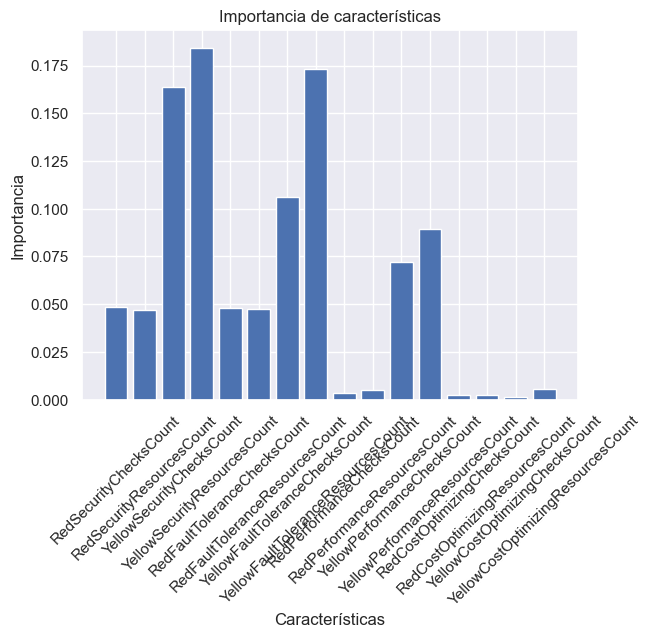

In [29]:
# Gráfico de barras para mostrar la importancia de cada característica
plt.bar(range(len(features)), importancias, tick_label=features)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.xticks(rotation=45)
plt.show()